## Analyzing Movie Subtitles 

Python module `pysrt` is used to handle `.srt` files (subtitle files). Python module `TextBlob` is used to process textual data. It provides a simple API for diving into common natural language processing (NLP) tasks such as part-of-speech tagging, noun phrase extraction, sentiment analysis, classification, translation, and more

### How do we perform sentiment analysis using TextBlob?
Polarity is float which lies in the range of [-1,1] where **1 means positive statement** and **-1 means a negative statement**

Example:

      [In]  print (blob)
            blob.sentiment
      
      [Out] Analytics Vidhya is a great platform to learn data science.
            Sentiment(polarity = 0.8, subjectivity = 0.75)

We can see that **polarity is 0.8**, which means that the statement is **positive**


**Overall Method**
- Divide total running time of video into constant time intervals
- Collect and combine the text in each time intervals
- Find the sentiment polarity of text in each time interval 
- Visualise variation of sentiment polarities in a line-graph

Reference: https://github.com/opencode18/dataviz-gallery/blob/master/movie-subtitles/sentiment_analysis.py

1) Import required python modules

In [1]:
from datetime import date, datetime, timedelta, time
import pysrt
from textblob import TextBlob
import matplotlib
from matplotlib import style
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

2) Specify plot style and dimensions 

In [2]:
sns.set()
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (16.0, 9.0)
style.use('fivethirtyeight')

3) Define function to extract sentiment polarities

(a) Helper function `create_intervals`: Used to create **equally spaced** time intervals

In [3]:
# Start - Start time
# End   - Ending time
# Delta - Interval period

def create_intervals(start, end, delta):
    curr = start
    while curr <= end:
        curr = (datetime.combine(date.today(), curr) + delta).time()
        yield curr

(b) Main function `get_sentiment`: Used to **extract sentiment data** for each time interval

In [4]:
def get_sentiment(file, delta = 2):
    
    # Read subtitles
    subs = pysrt.open(file, encoding = 'iso-8859-1')
    n = len(subs)
    
    # Empty list to store time periods
    intervals = []
    
    # Start, End and Delta
    start = time(0, 0, 0)
    end = subs[-1].end.to_time()
    delta = timedelta(minutes = delta)
    for result in create_intervals(start, end, delta):
        intervals.append(result)
        
    # Empty list to store sentiment polarities
    sentiments = []
    
    index = 0
    m = len(intervals)
    
    # Collect and combine text in each time interval
    for i in range(m):
        text = ""
        for j in range(index, n):
            
            # Find all subtitle text in each time interval
            if subs[j].end.to_time() < intervals[i]:
                text += subs[j].text_without_tags + " "
            else:
                break
                
        # Sentiment Analysis
        blob = TextBlob(text)
        pol = blob.sentiment.polarity
        sentiments.append(pol)
        index = j
        
    # Add Initial State
    intervals.insert(0, time(0, 0, 0))
    sentiments.insert(0, 0.0)
    return (intervals, sentiments)

(c) Average function `average`: Used to obtain **average sentiment polarity** over **entire length of subtitle text**

In [5]:
def average(y):
    avg = float(sum(y))/len(y)
    return avg

4) Run program with Logan (2017) subtitle script and plot graph

In [6]:
# Change working directory 
import os 
os.chdir('/Users/nmfamily/Desktop')
os.getcwd() 

'/Users/nmfamily/Desktop'

In [7]:
# Obtain x = time intervals, and y = sentiment polarities 
x, y = get_sentiment('Logan_2017.srt')

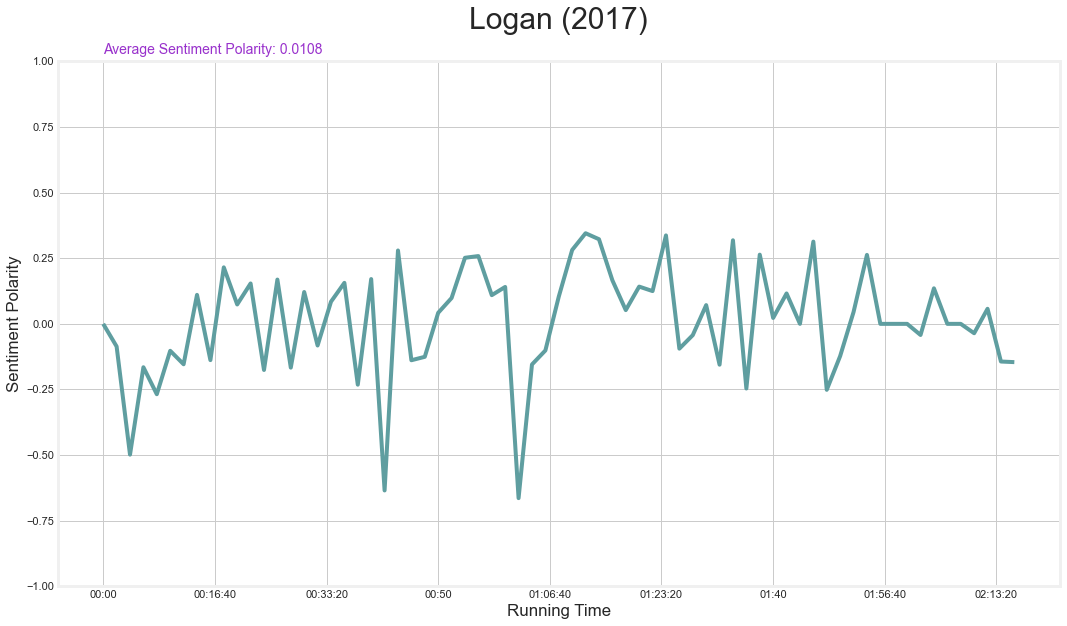

In [11]:
# Plot graph
fig, ax = plt.subplots()
fig.patch.set_facecolor('white')
ax.patch.set_facecolor('white')
plt.plot(x, y, 'cadetblue')
plt.title('Logan (2017)', fontsize = 30)
plt.ylim((-1, 1))
plt.ylabel('Sentiment Polarity')
plt.xlabel('Running Time')
plt.text(.5, 1.03, 'Average Sentiment Polarity: ' + str(round(average(y), 4)), color = 'darkorchid')
ttl = ax.title
ttl.set_position([.5, 1.05])
plt.show()

5) Replicate process and run program for other movies 

In [9]:
pd.plotting.register_matplotlib_converters()